In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


In [44]:
dataset= pd.read_csv("Social_Network_Ads.csv")
dataset.head(5)

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [45]:
dataset.drop(columns=["User ID","Gender"],inplace=True)

In [46]:
dataset.head(5)

Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

In [47]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

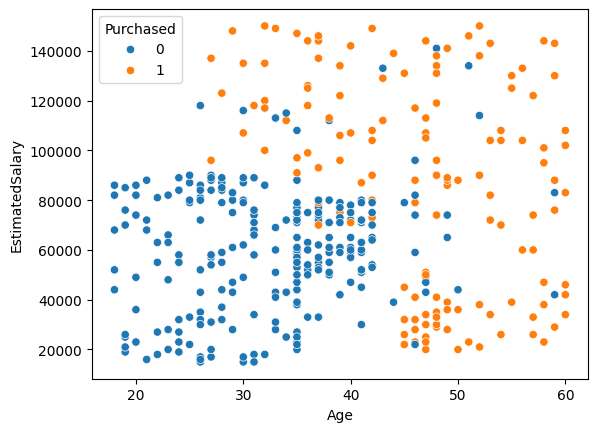

In [48]:
sns.scatterplot(x="Age",y="EstimatedSalary",data=dataset,hue="Purchased")
plt.show()

In [49]:
x=dataset.iloc[:,:-1]
y=dataset["Purchased"]

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [70]:
dt.score(x_test,y_test)*100

89.0

checking the pruning

diference between the axccuracy of trainig and 
test data

In [65]:
dt.score(x_test,y_test)*100

82.0

In [71]:
dt.score(x_train,y_train)*100

93.33333333333333

In [72]:
dt.predict([[35,20000]])

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


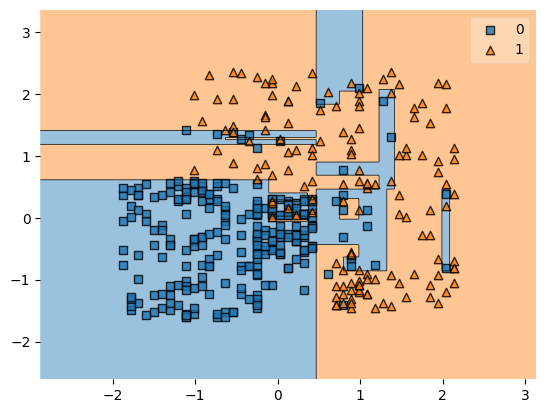

In [64]:
import numpy as np

# Convert DataFrame/Series to NumPy arrays
X = x.values       # shape (n_samples, n_features)
Y = y.values       # shape (n_samples,)

# Then plot
plot_decision_regions(X, Y, clf=dt)
plt.show()


In [ ]:
from sklearn.tree import plot_tree


pre pruning max depth

<function matplotlib.pyplot.show(close=None, block=None)>

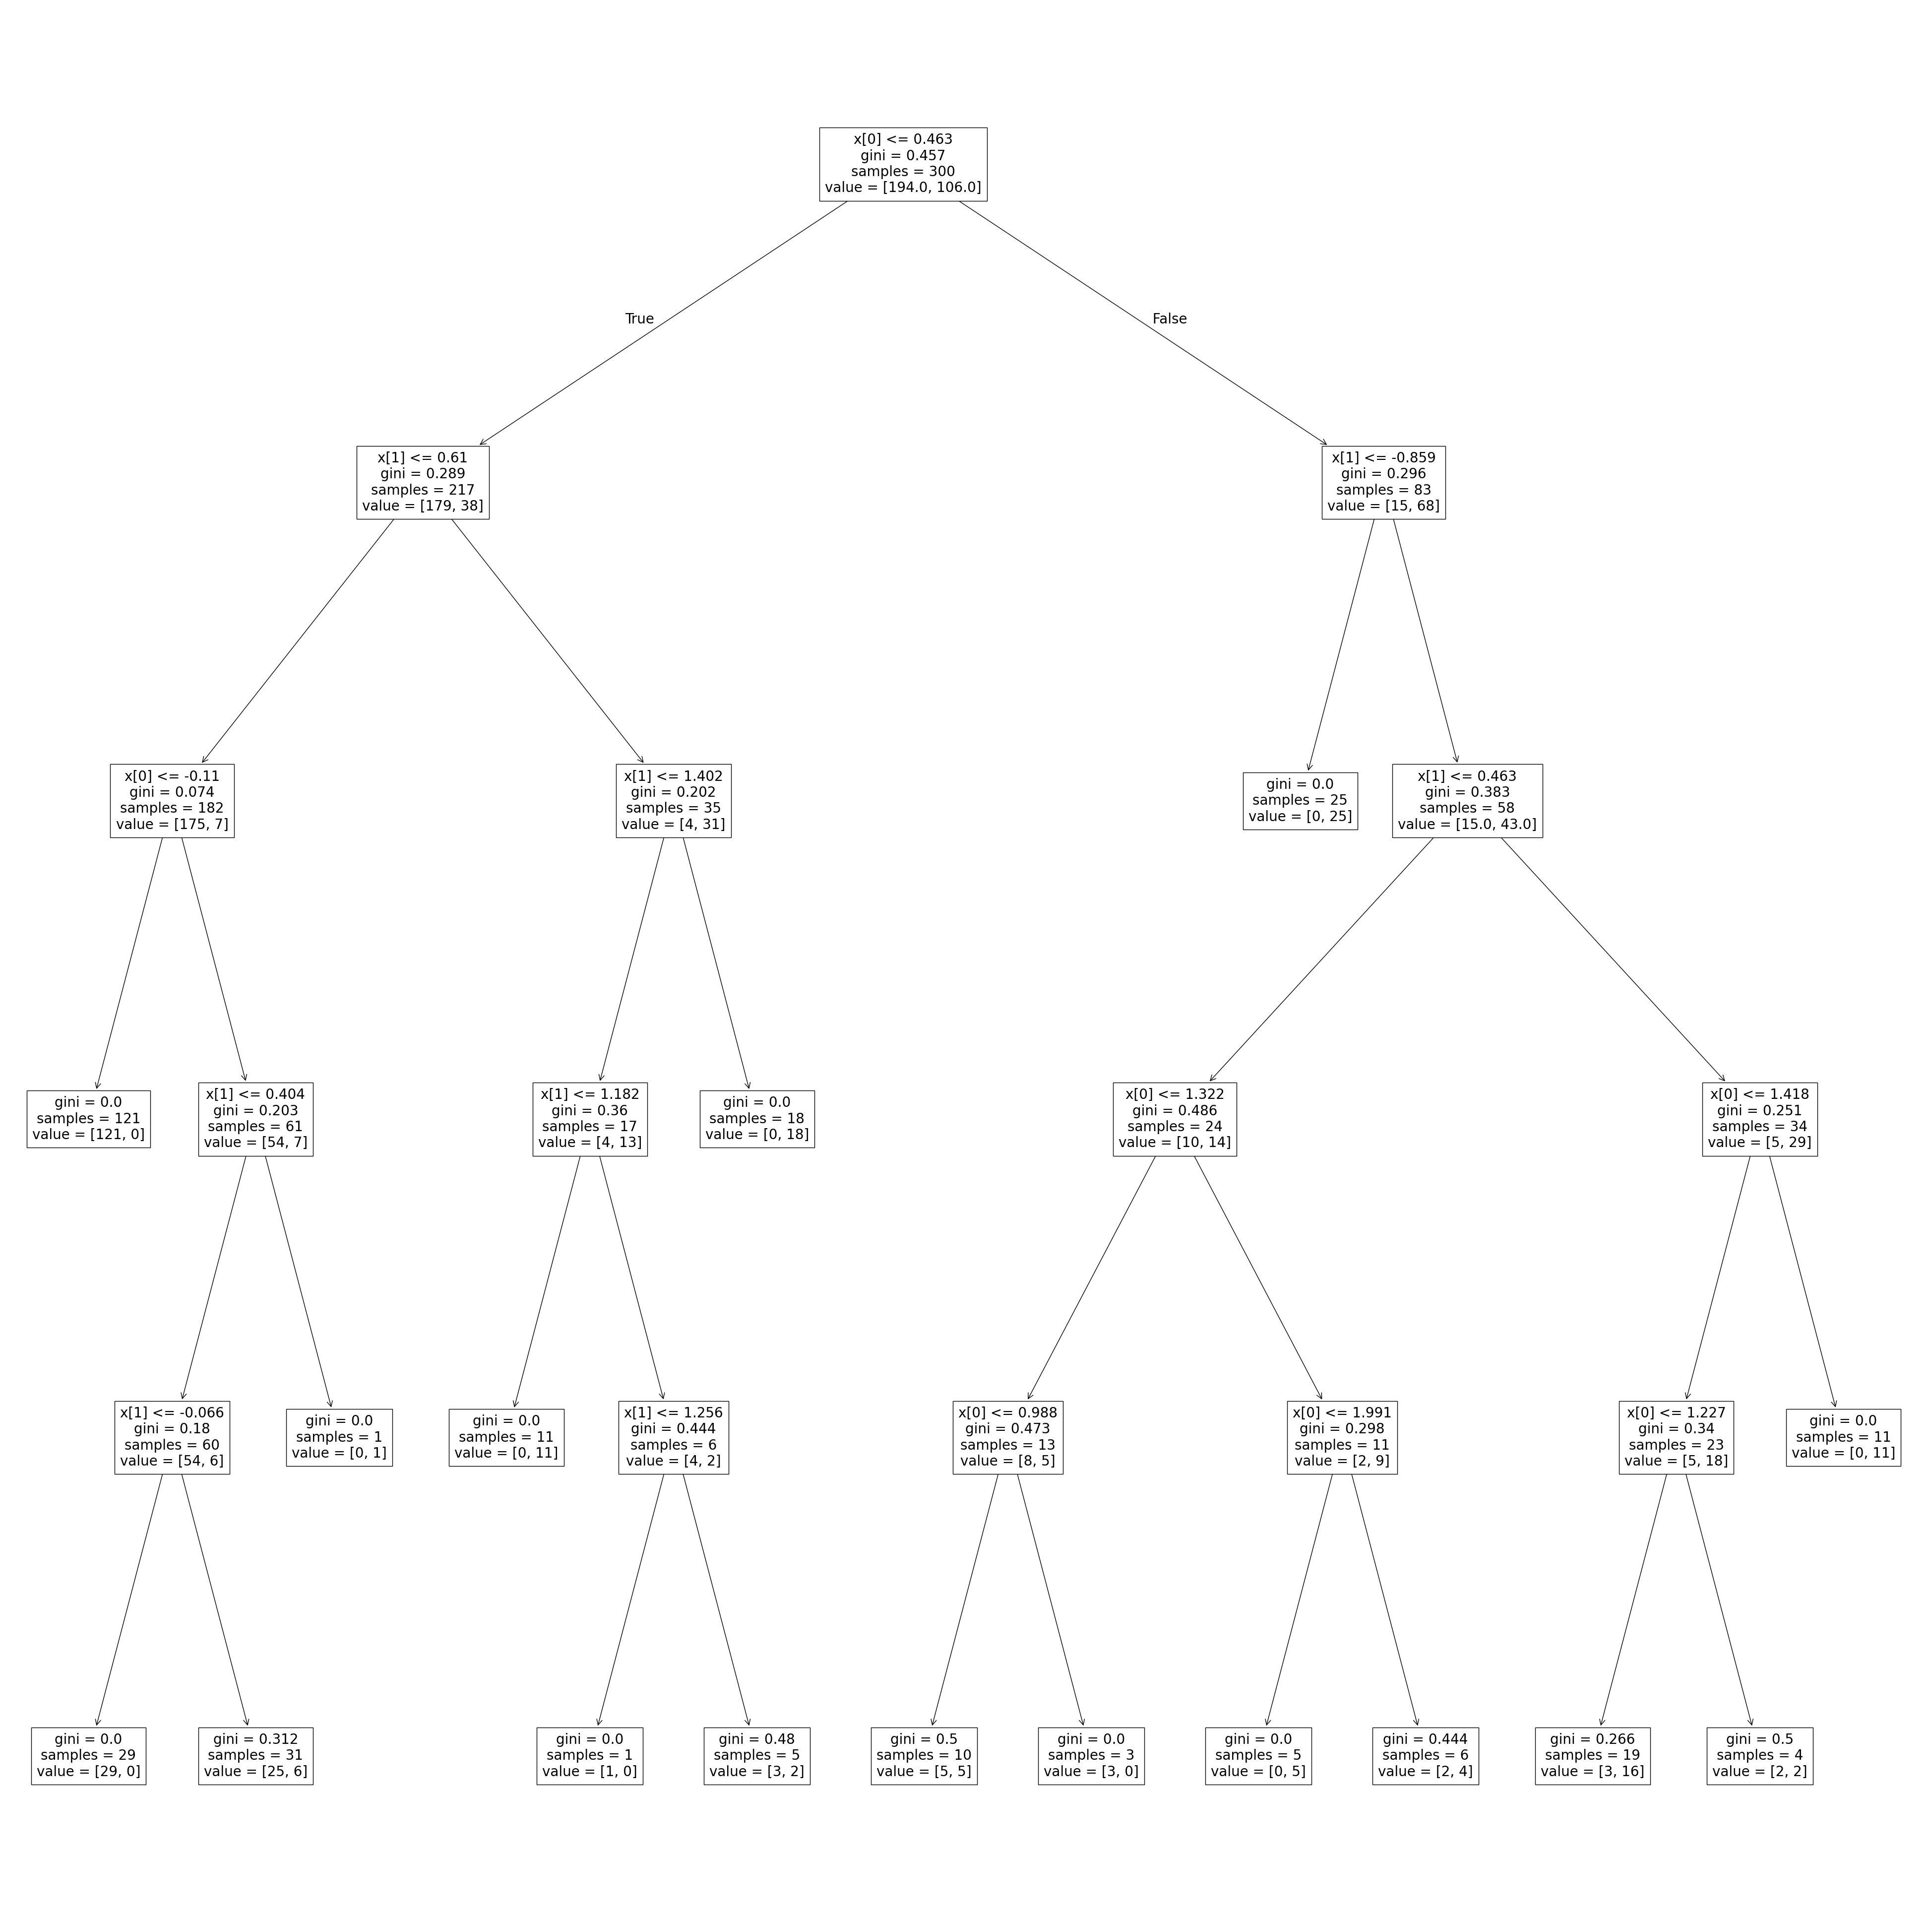

In [73]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.show

In [ ]:
dt1=DecisionTreeClassifier(criterion="entropy")
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
dt1.score(x_test,y_test)*100

83.0

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtt=DecisionTreeRegressor()
dtt.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
dtt.score(x_test,y_test)*100

27.069927069927058

In [ ]:
dt.predict([[35,20000]])

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
from sklearn.tree import plot_tree


<function matplotlib.pyplot.show(close=None, block=None)>

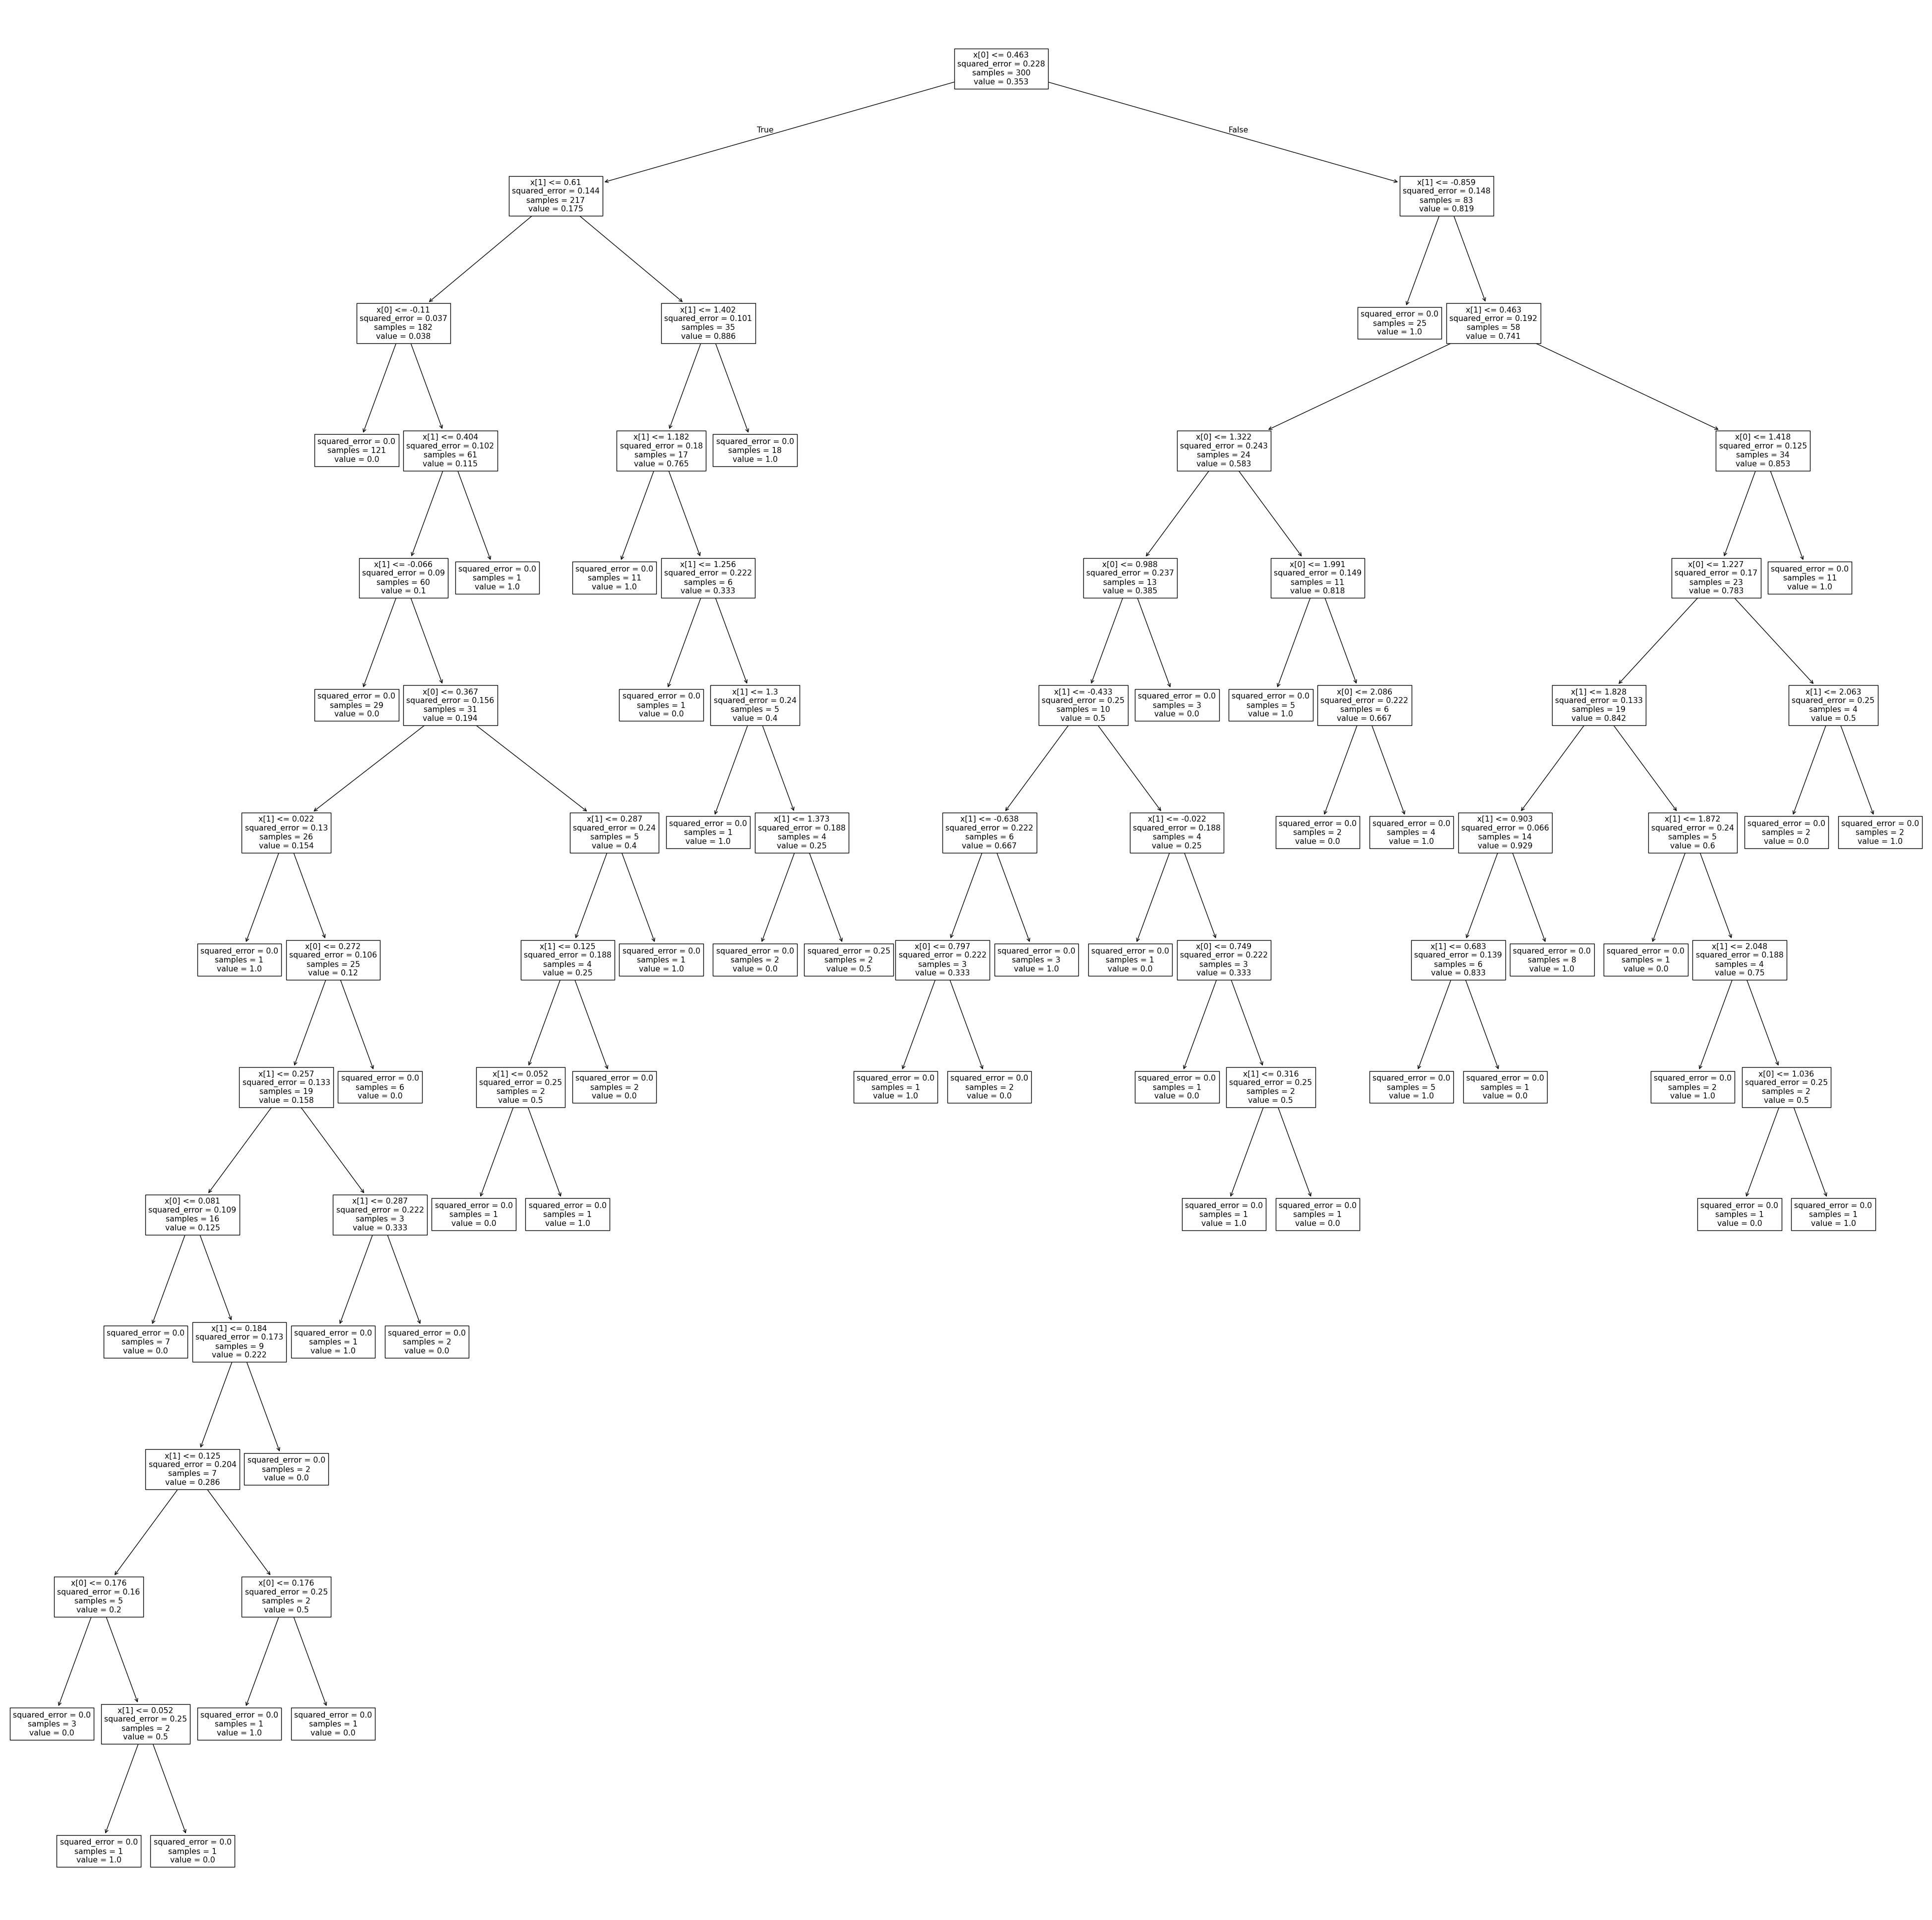

In [ ]:
plt.figure(figsize=(50,50))
plot_tree(dtt)
plt.show

post pruning

In [76]:
from sklearn.tree import DecisionTreeClassifier

for i in range(1, 20):
    dt2 = DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train, y_train)
    print(f"Depth: {i} | Train Accuracy: {dt2.score(x_train, y_train):.3f} | Test Accuracy: {dt2.score(x_test, y_test):.3f}")


Depth: 1 | Train Accuracy: 0.823 | Test Accuracy: 0.890
Depth: 2 | Train Accuracy: 0.913 | Test Accuracy: 0.920
Depth: 3 | Train Accuracy: 0.913 | Test Accuracy: 0.920
Depth: 4 | Train Accuracy: 0.933 | Test Accuracy: 0.910
Depth: 5 | Train Accuracy: 0.933 | Test Accuracy: 0.890
Depth: 6 | Train Accuracy: 0.957 | Test Accuracy: 0.890
Depth: 7 | Train Accuracy: 0.970 | Test Accuracy: 0.870
Depth: 8 | Train Accuracy: 0.977 | Test Accuracy: 0.830
Depth: 9 | Train Accuracy: 0.987 | Test Accuracy: 0.840
Depth: 10 | Train Accuracy: 0.990 | Test Accuracy: 0.840
Depth: 11 | Train Accuracy: 0.990 | Test Accuracy: 0.830
Depth: 12 | Train Accuracy: 0.990 | Test Accuracy: 0.840
Depth: 13 | Train Accuracy: 0.993 | Test Accuracy: 0.850
Depth: 14 | Train Accuracy: 0.997 | Test Accuracy: 0.830
Depth: 15 | Train Accuracy: 0.997 | Test Accuracy: 0.830
Depth: 16 | Train Accuracy: 0.997 | Test Accuracy: 0.830
Depth: 17 | Train Accuracy: 0.997 | Test Accuracy: 0.830
Depth: 18 | Train Accuracy: 0.997 | Test

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


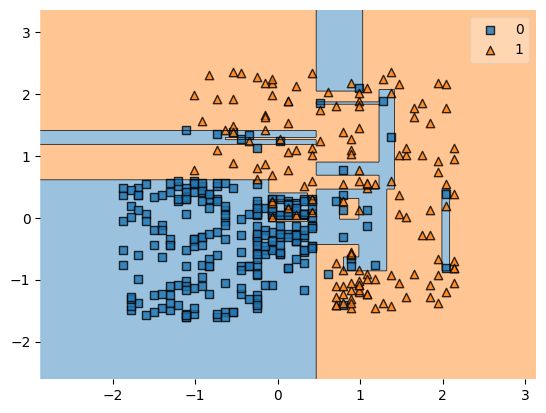

In [77]:
import numpy as np

# Convert DataFrame/Series to NumPy arrays
X = x.values       # shape (n_samples, n_features)
Y = y.values       # shape (n_samples,)

# Then plot
plot_decision_regions(X, Y, clf=dt2)
plt.show()
